#Company Bankruptcy Prediction









Connecting Google Colab to Kaggle to get Dataset directly to colab

Downloading the helper functions designed by mrdbourke which contains custom functions

In [6]:
import urllib.request

url = "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py"
urllib.request.urlretrieve(url, "helper_functions.py")

('helper_functions.py', <http.client.HTTPMessage at 0x15b70b77ed0>)

Installing required library for EDA process

In [2]:
!pip install klib


[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'



[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install sweetviz


[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Importing required functions from helper functions


In [7]:
from helper_functions import plot_loss_curves, make_confusion_matrix, accuracy_score,calculate_results

Importing required libraries

In [8]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import seaborn as sns
import klib
import sweetviz as sv

importing the dataset

In [9]:
df = pd.read_csv("data.csv")

Viewing first 5 rows of the dataset

In [10]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


#Part 1 : Exploratory Data Analysis

In [11]:
df_clean = klib.data_cleaning(df)

Shape of cleaned data: (6819, 95) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 1
     of which 1 single valued.     Columns: ['net_income_flag']
Dropped missing values: 0
Reduced memory by at least: 2.01 MB (-40.28%)



Note: The number of non binary numerical features is very large (93), please consider splitting the data. Showing plots for the first 20 numerical features. Override this by setting showall=True.


<Axes: xlabel='cash_flow_per_share', ylabel='Density'>

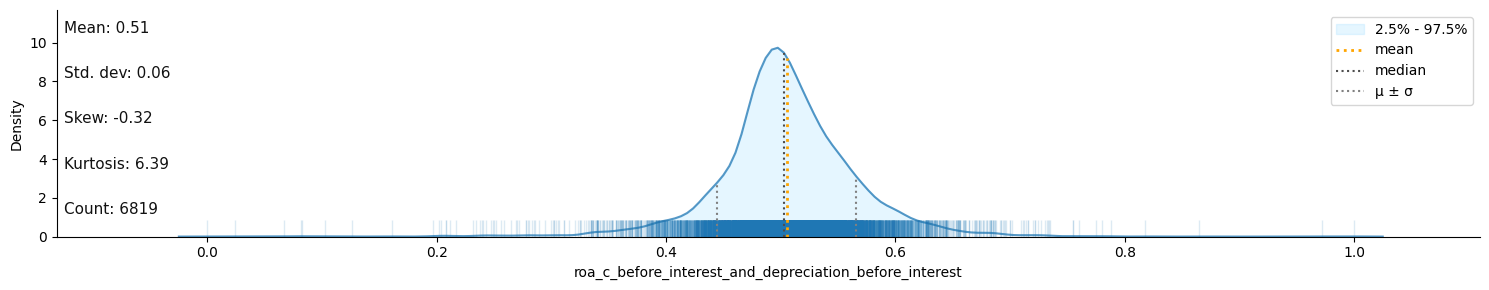

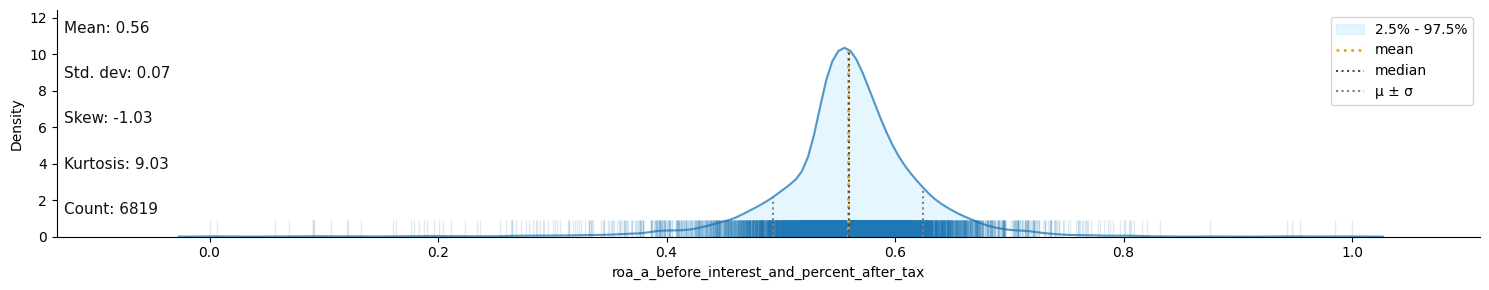

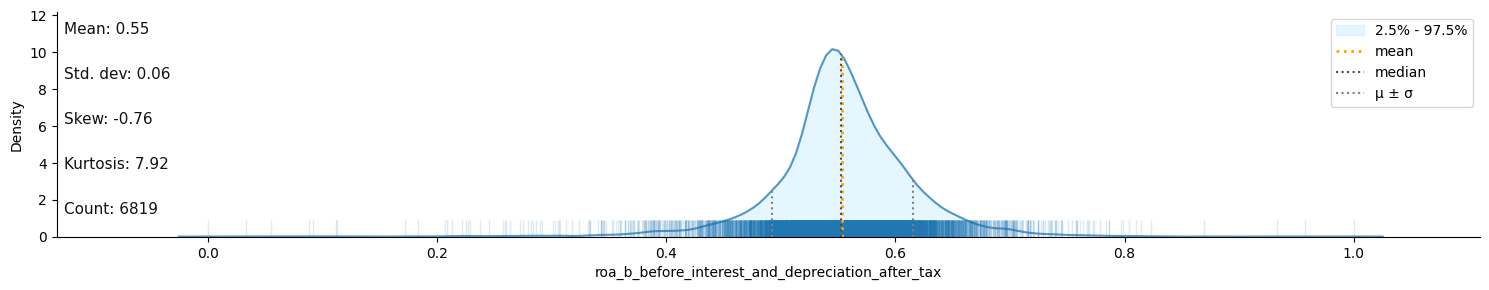

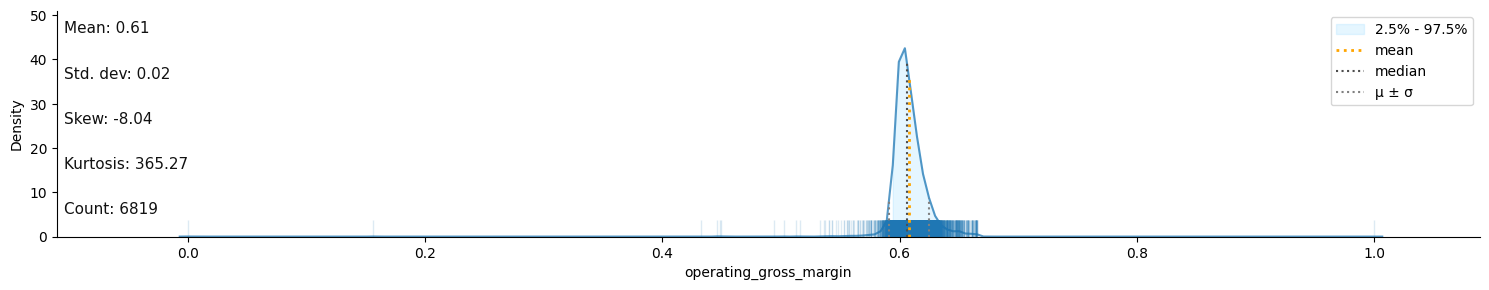

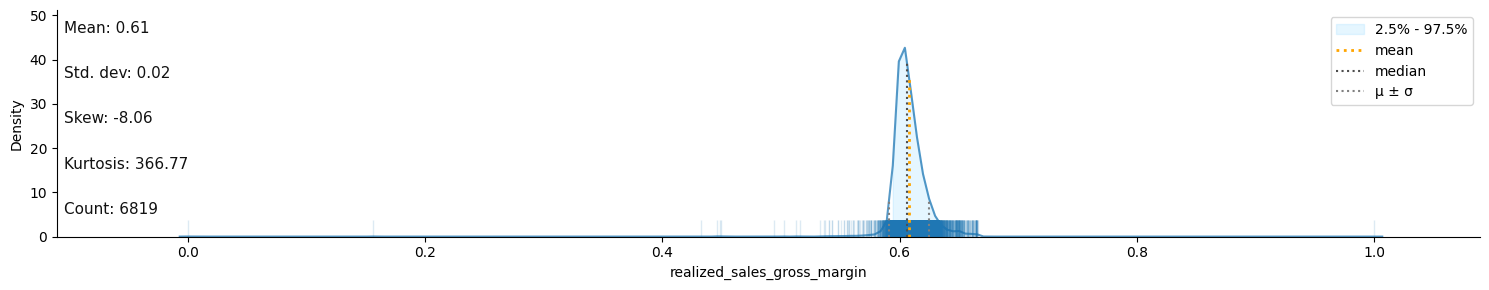

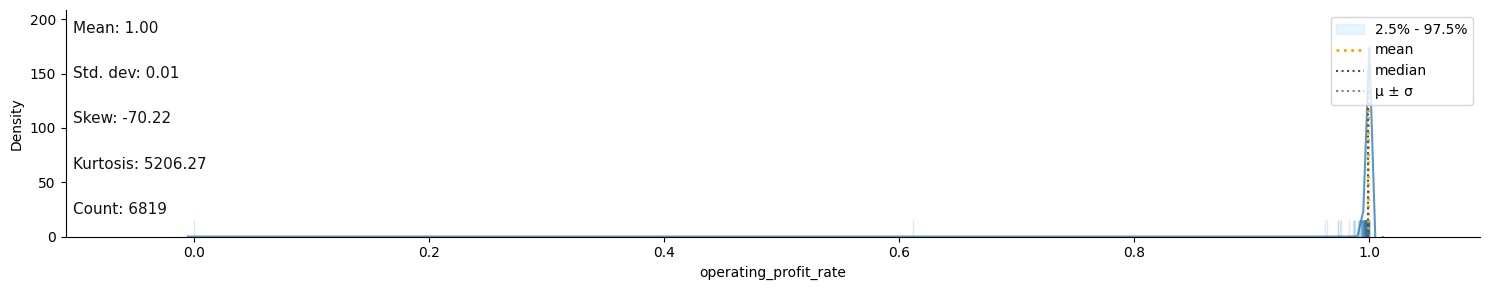

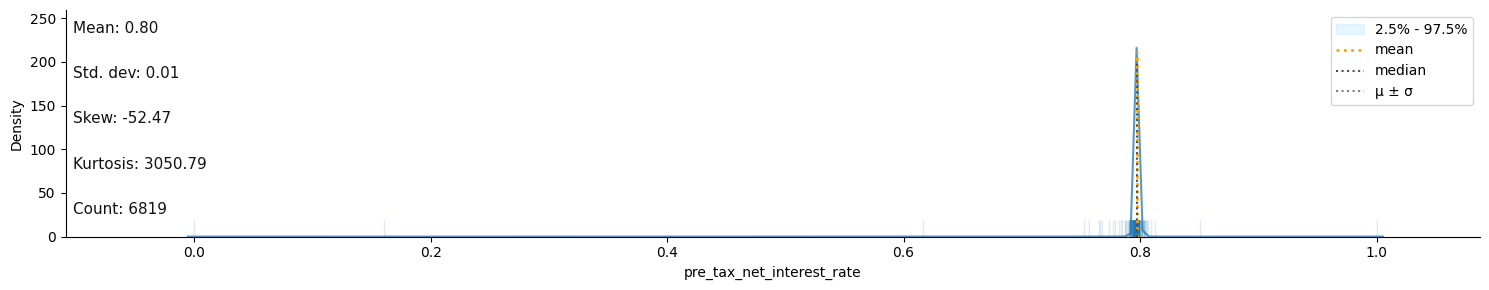

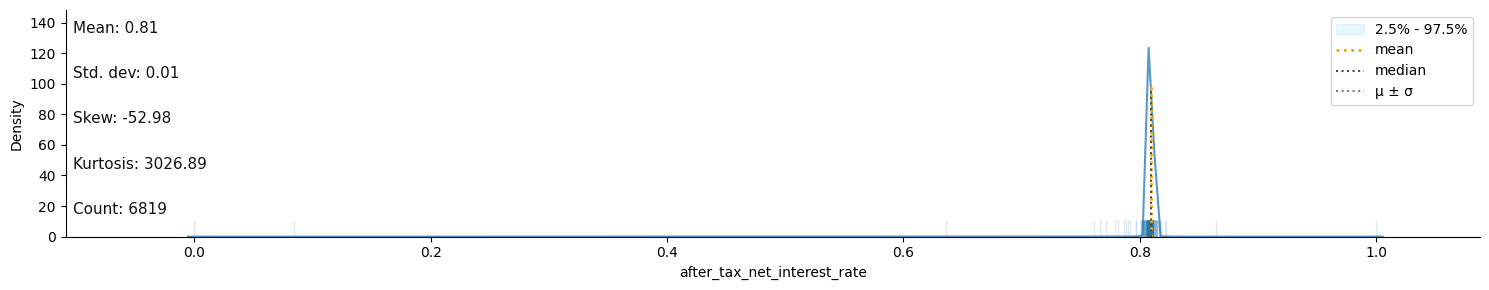

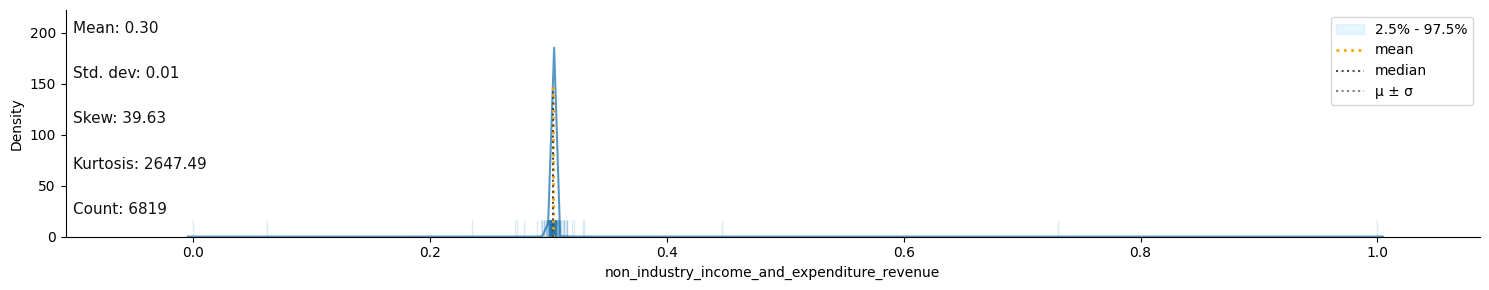

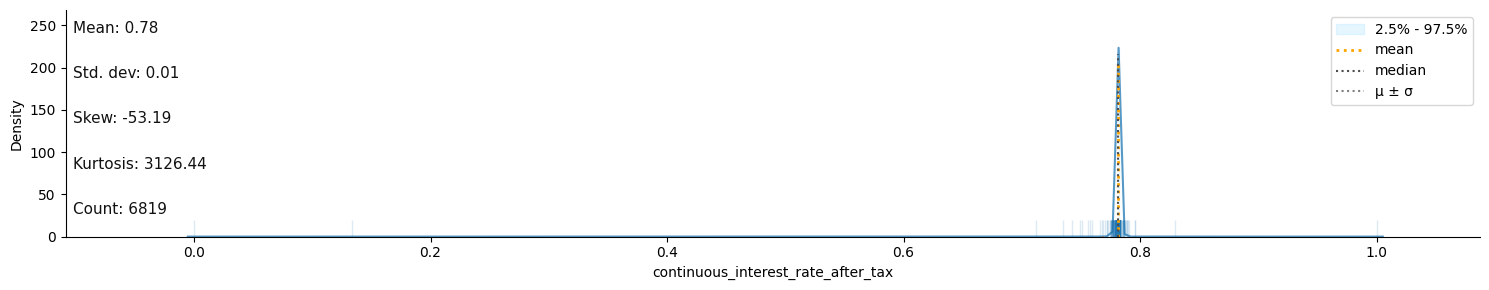

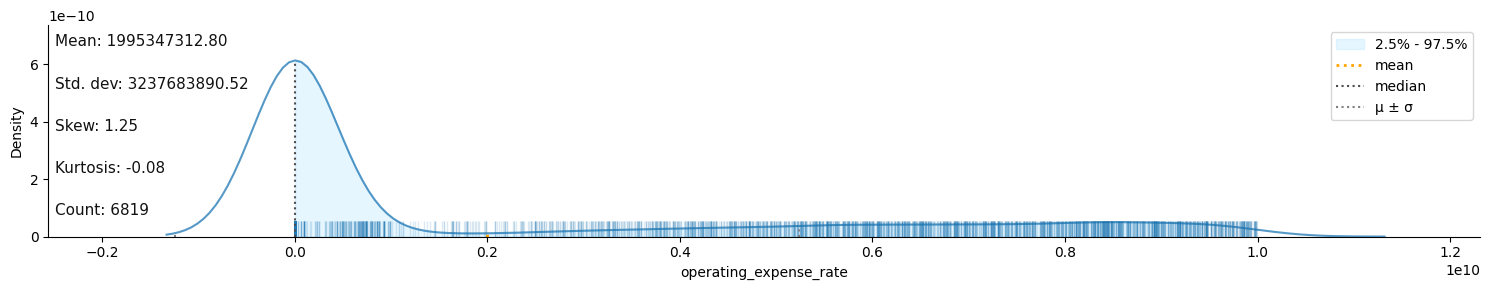

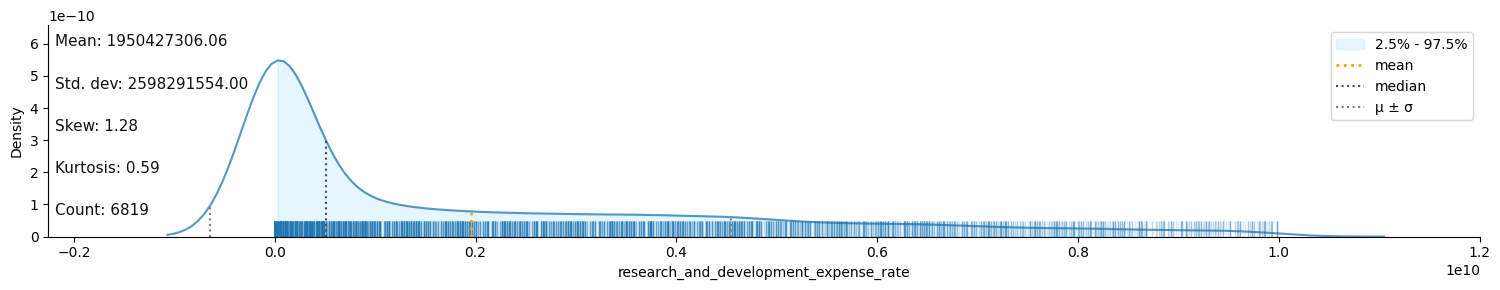

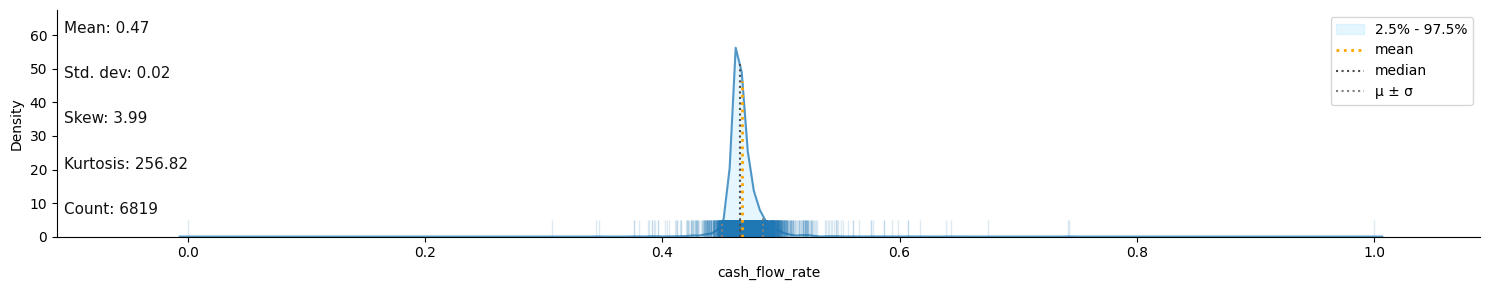

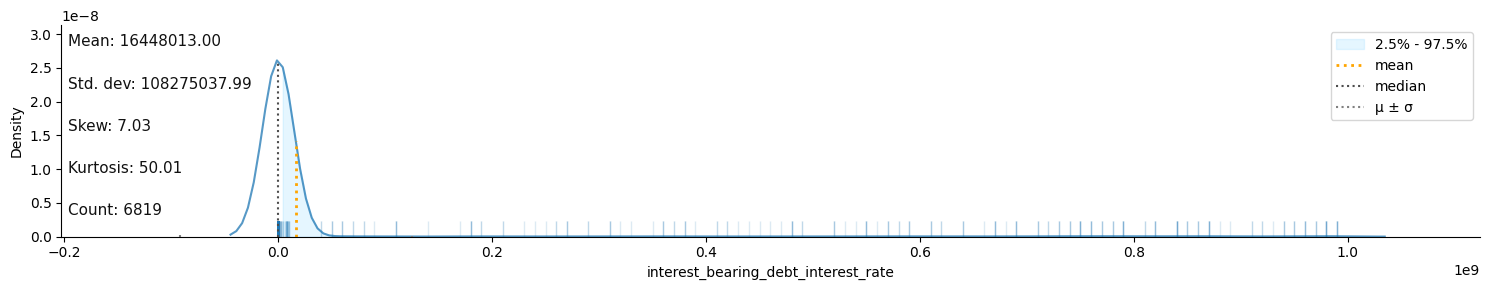

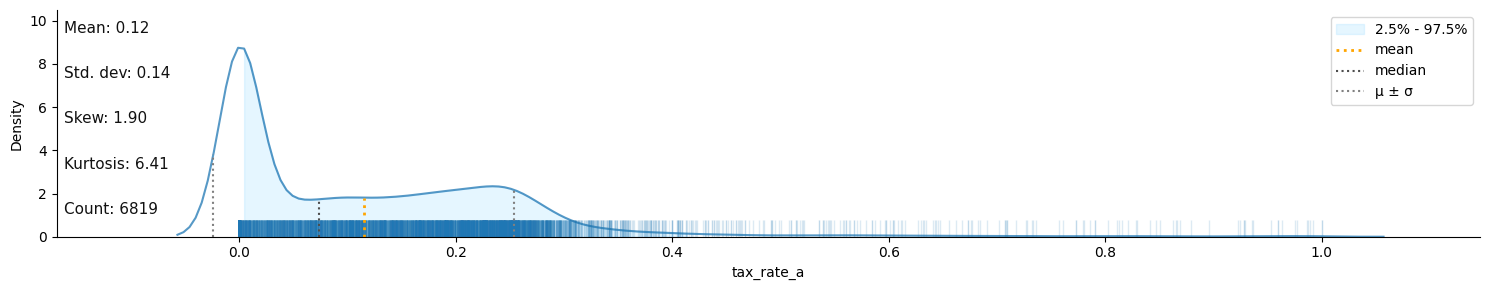

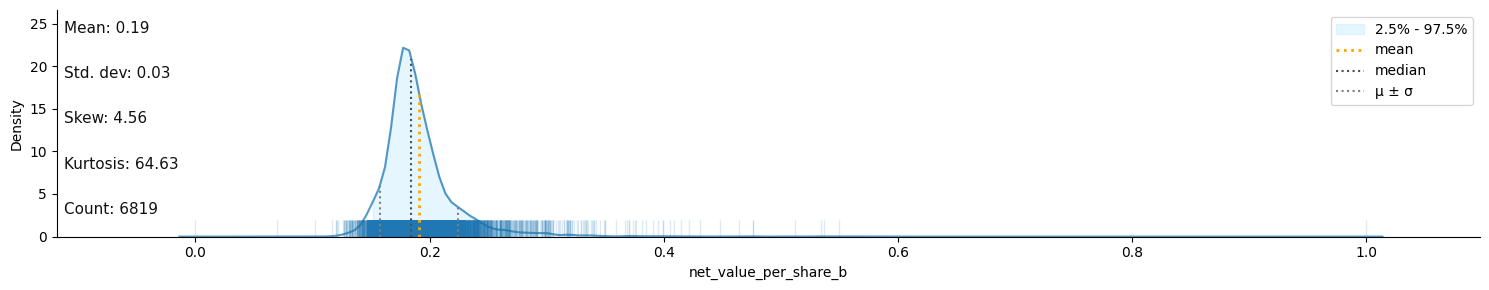

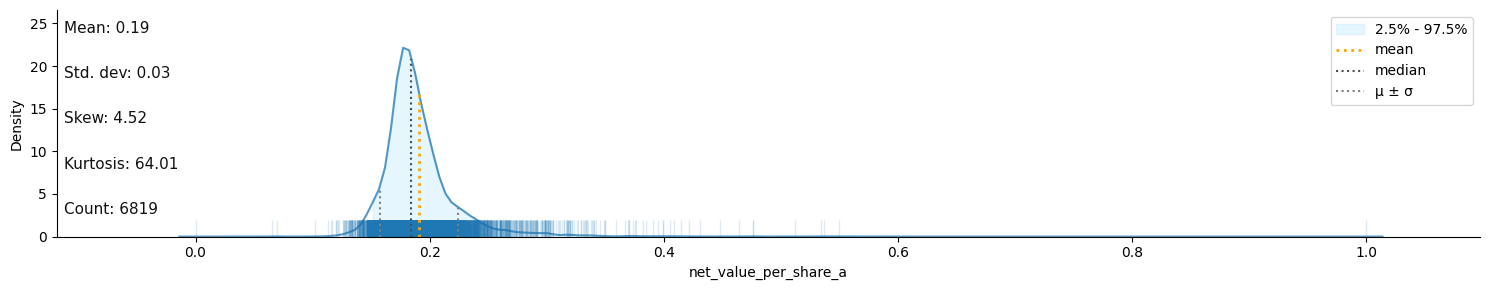

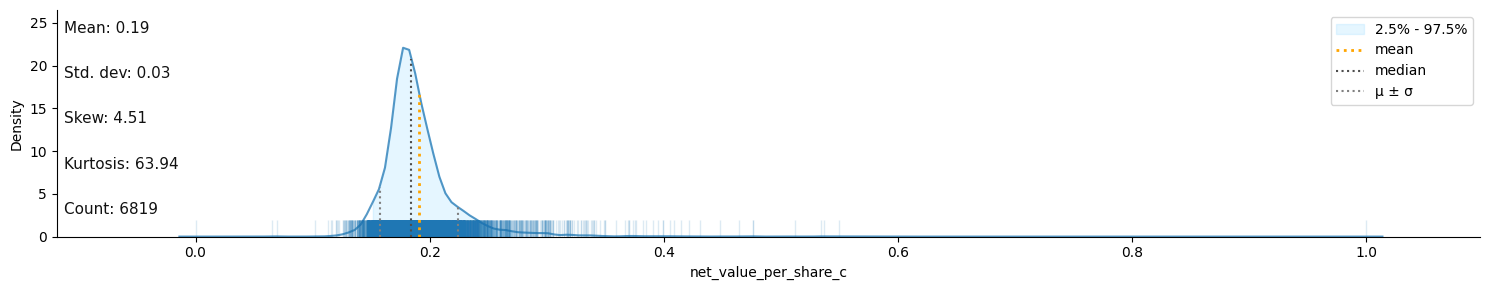

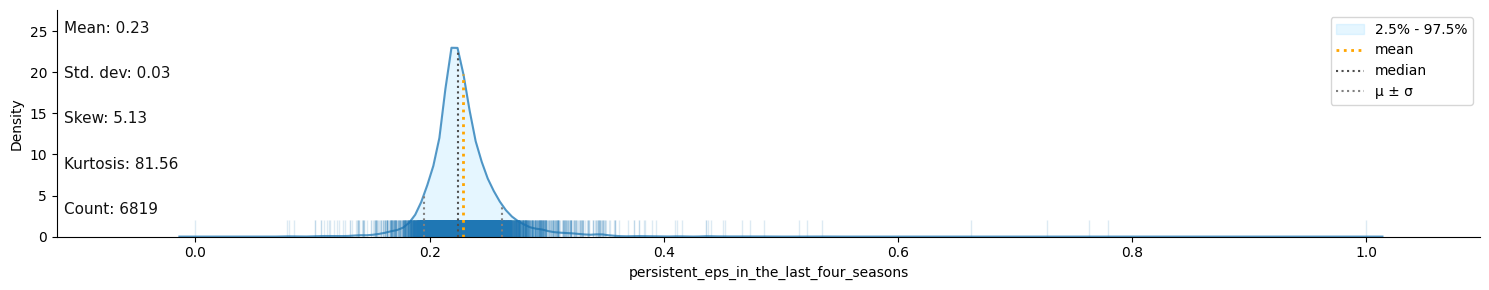

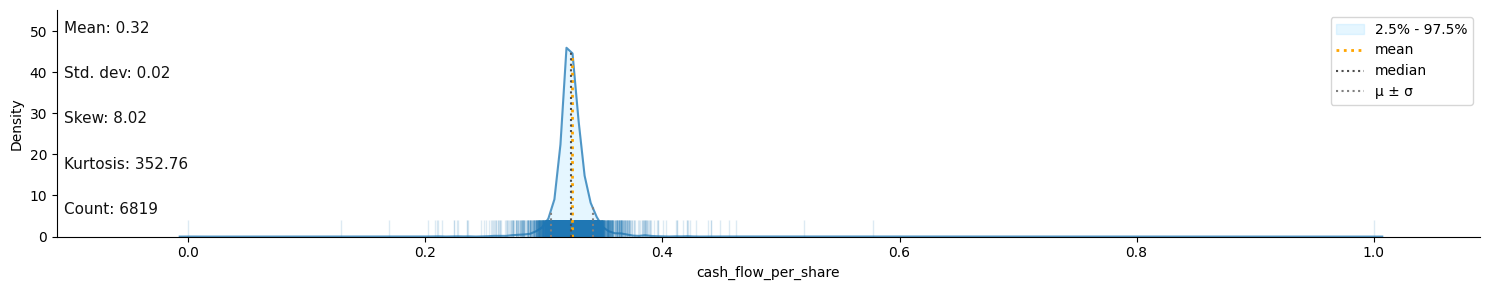

In [12]:
klib.dist_plot(df_clean)

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   bankrupt                                                6819 non-null   int8   
 1   roa_c_before_interest_and_depreciation_before_interest  6819 non-null   float32
 2   roa_a_before_interest_and_percent_after_tax             6819 non-null   float32
 3   roa_b_before_interest_and_depreciation_after_tax        6819 non-null   float32
 4   operating_gross_margin                                  6819 non-null   float32
 5   realized_sales_gross_margin                             6819 non-null   float32
 6   operating_profit_rate                                   6819 non-null   float32
 7   pre_tax_net_interest_rate                               6819 non-null   float32
 8   after_tax_net_interest_rate           

Checking the imbalanced data

In [15]:
df_clean['bankrupt'].value_counts()

bankrupt
0    6599
1     220
Name: count, dtype: int64

Over Sampling Method for Imbalanced Target Variable


*   As the Target Variable i.e Bankrupt? contains less no of companies goes bankrupt i.e no of 1 is less as compared to 0. This is where we use oversampling method to make this two classes balanced,



In [16]:
from imblearn.over_sampling import SMOTE

In [17]:
X = df_clean.drop('bankrupt', axis = 'columns')
y = df_clean['bankrupt']

In [18]:
smote = SMOTE(sampling_strategy='minority')
X,y= smote.fit_resample(X,y)

In [19]:
X.shape

(13198, 94)

In [20]:
y.value_counts()

bankrupt
1    6599
0    6599
Name: count, dtype: int64

As you see the dependent variable i.e Bankrupt? variable is balanced, now you can perform data preprocessing step

#Part 2 : Data Preprocessing

Spliting the data into training and test set 

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Part 3 : Model Building


> List of the models which I'm going used :



*   XGBoost
*   Logistic Regression
* Deep Neural Network
* Random Forest Classification
* K-Nearest Neighbours













XGBoost

In [25]:
from xgboost import XGBClassifier
model_1 = XGBClassifier()
model_1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

Testing the Model on Test Set

In [26]:
y_pred = model_1.predict(X_test)

Evaluating the Model

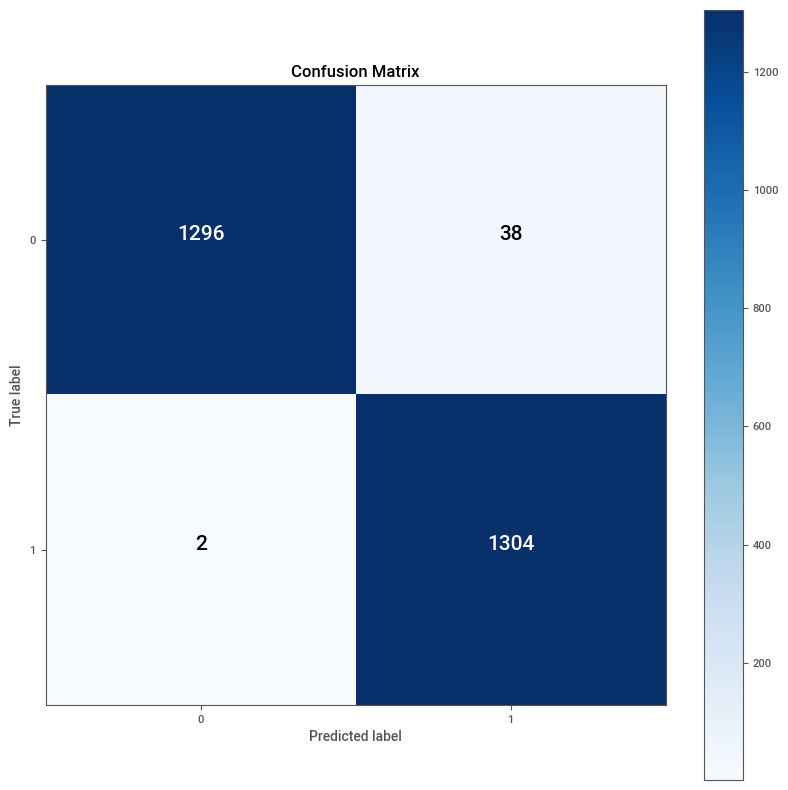

In [27]:
make_confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
xgboost = calculate_results(y_test, y_pred)

Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
model_2 = LogisticRegression()
model_2.fit(X_train, y_train)

LogisticRegression()

In [29]:
y_pred = model_2.predict(X_test)

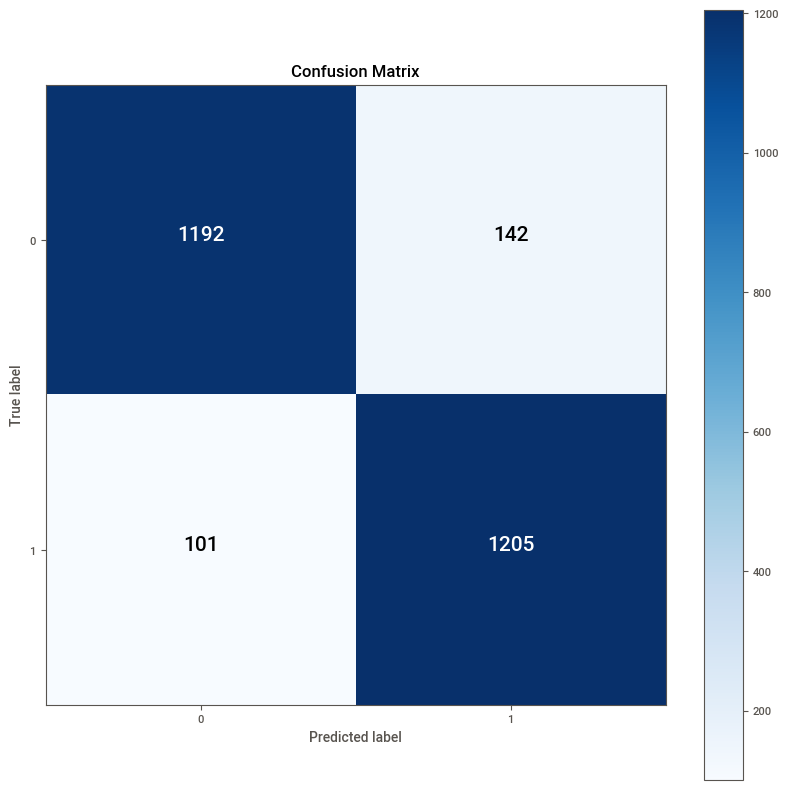

In [30]:
make_confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
logistic = calculate_results(y_test, y_pred)

Deep Neural Network (DNN)

In [31]:
model_3 = tf.keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(512, activation = 'relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation = 'sigmoid')

])

model_3.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [32]:
history = model_3.fit(X_train, y_train, validation_split = 0.2, epochs = 20)

Epoch 1/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8679 - loss: 0.3206 - val_accuracy: 0.9503 - val_loss: 0.1458
Epoch 2/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9514 - loss: 0.1390 - val_accuracy: 0.9541 - val_loss: 0.1168
Epoch 3/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9729 - loss: 0.0829 - val_accuracy: 0.9787 - val_loss: 0.0682
Epoch 4/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9843 - loss: 0.0623 - val_accuracy: 0.9811 - val_loss: 0.0662
Epoch 5/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9890 - loss: 0.0463 - val_accuracy: 0.9792 - val_loss: 0.0930
Epoch 6/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9896 - loss: 0.0361 - val_accuracy: 0.9806 - val_loss: 0.0820
Epoch 7/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9935 - loss: 0.0220 - val_accuracy: 0.9844 - val_loss: 0.0675
Epoch 8/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9963 - loss: 0.0133 - val_accuracy: 0.

Ploting loss and accuracy curves to check model performance

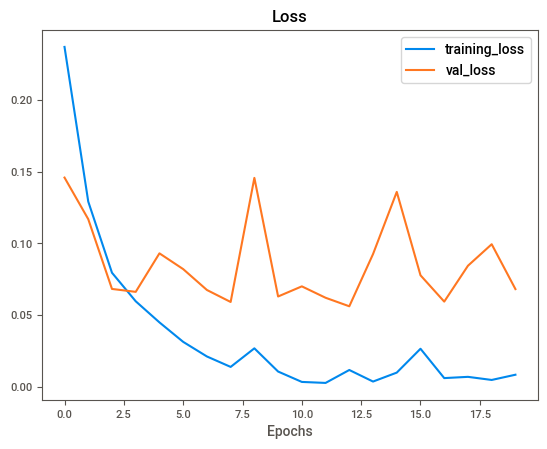

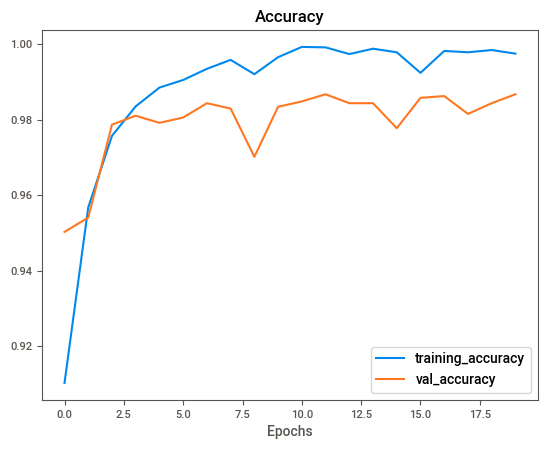

In [33]:
plot_loss_curves(history)

In [34]:
y_probs = model_3.predict(X_test)
y_pred = tf.round(y_probs)

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


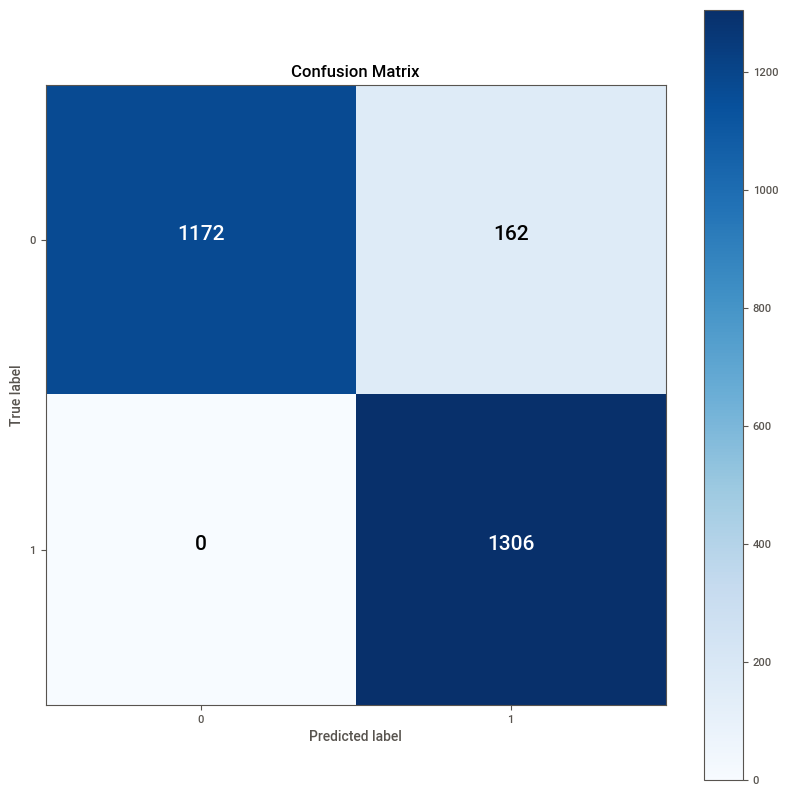

In [45]:
make_confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
dnn = calculate_results(y_test, y_pred)

In [35]:
model_3.save("dnn best model.h5")

Random Forest Classification

In [36]:
from sklearn.ensemble import RandomForestClassifier
model_4 = RandomForestClassifier(n_estimators=1000, criterion = 'entropy', random_state = 42)
model_4.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=42)

In [37]:
y_pred = model_2.predict(X_test)

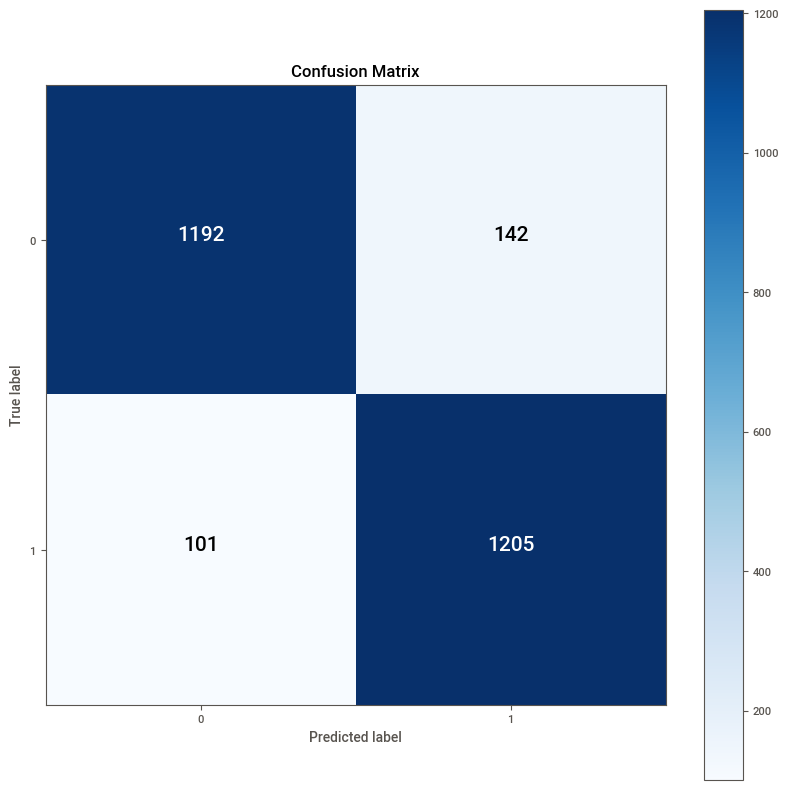

In [38]:
make_confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
rf = calculate_results(y_test, y_pred)

K-Nearest Neighbor

In [39]:
from sklearn.neighbors import KNeighborsClassifier
model_5 = KNeighborsClassifier()
model_5.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
y_pred = model_5.predict(X_test)

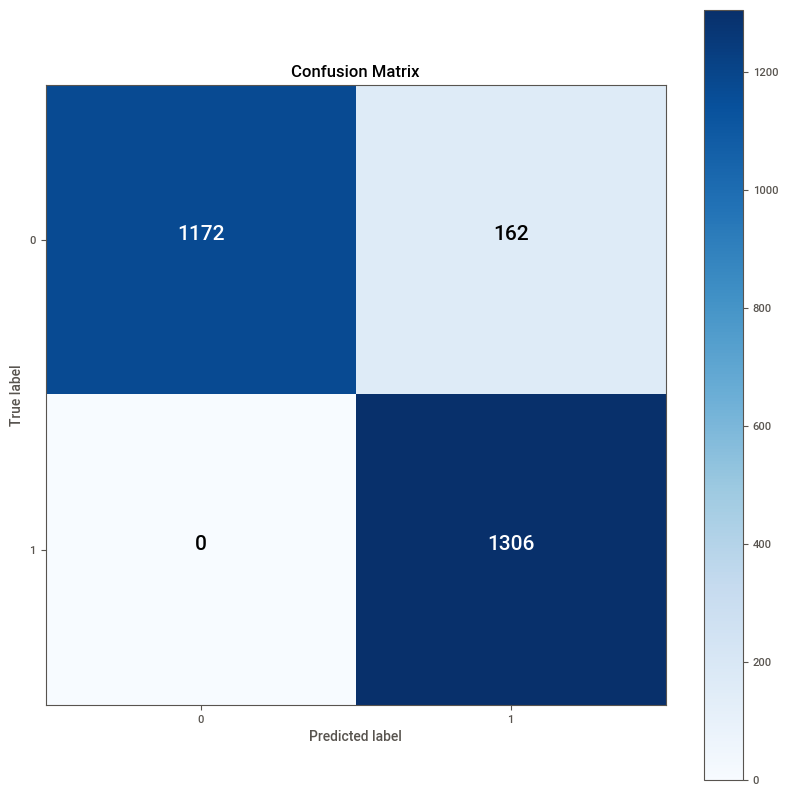

In [42]:
make_confusion_matrix(y_test, y_pred)

In [43]:
knn = calculate_results(y_test, y_pred)

Creating a dataframe to check which model have performed better

In [46]:
model_perf = pd.DataFrame({"XGBoost":xgboost,"Logistic Regression":logistic,"Deep Neural Network":dnn, "Random Forest":rf,"K nearest Neighbours":knn})

In [47]:
model_perf = model_perf.transpose()

In [48]:
# Sorting by column 'accuracy'
model_perf.sort_values(by=['accuracy'],ascending=False)

,accuracy,precision,recall,f1
XGBoost,98.484848,0.985214,0.984848,0.984848
Deep Neural Network,93.863636,0.945408,0.938636,0.938445
K nearest Neighbours,93.863636,0.945408,0.938636,0.938445
Logistic Regression,90.795455,0.908379,0.907955,0.907948
Random Forest,90.795455,0.908379,0.907955,0.907948


Well It's seems like DNN Model is a clean winner. So, this model will be our best performing model so far

#Models Performance Evaluation

Ploting and Comparing ROC Curves of Mutiple Models

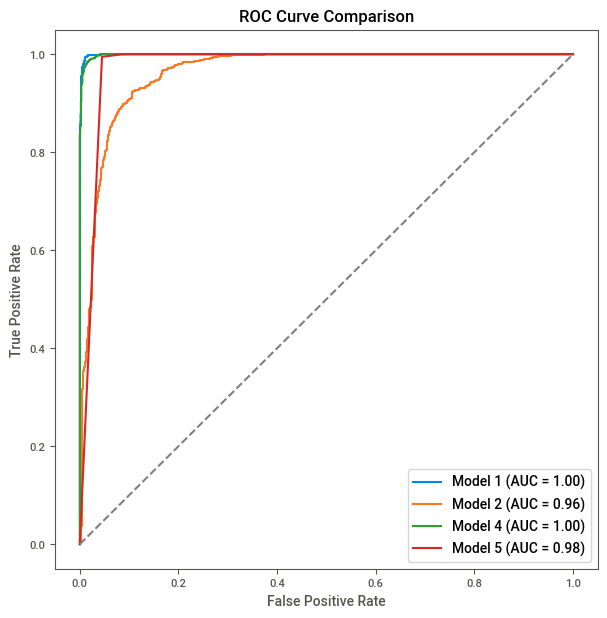

In [50]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Dictionary of models you want to compare
models = {
    "Model 1": model_1,
    "Model 2": model_2,
    "Model 4": model_4,
    "Model 5": model_5
}

plt.figure(figsize=(7, 7))

for name, model in models.items():
    # Get predicted probabilities for the positive class
    y_probs = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Add baseline
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")

# Labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()


Sklearn can't plot this curve for DNN Model so i have used tensorflow metrics library to get auc value

In [51]:
dnn_m = tf.keras.metrics.AUC()
dnn_m.update_state(y_test, y_pred)
print("DNN Model AUC Value is :", dnn_m.result().numpy())

DNN Model AUC Value is : 0.9392804
